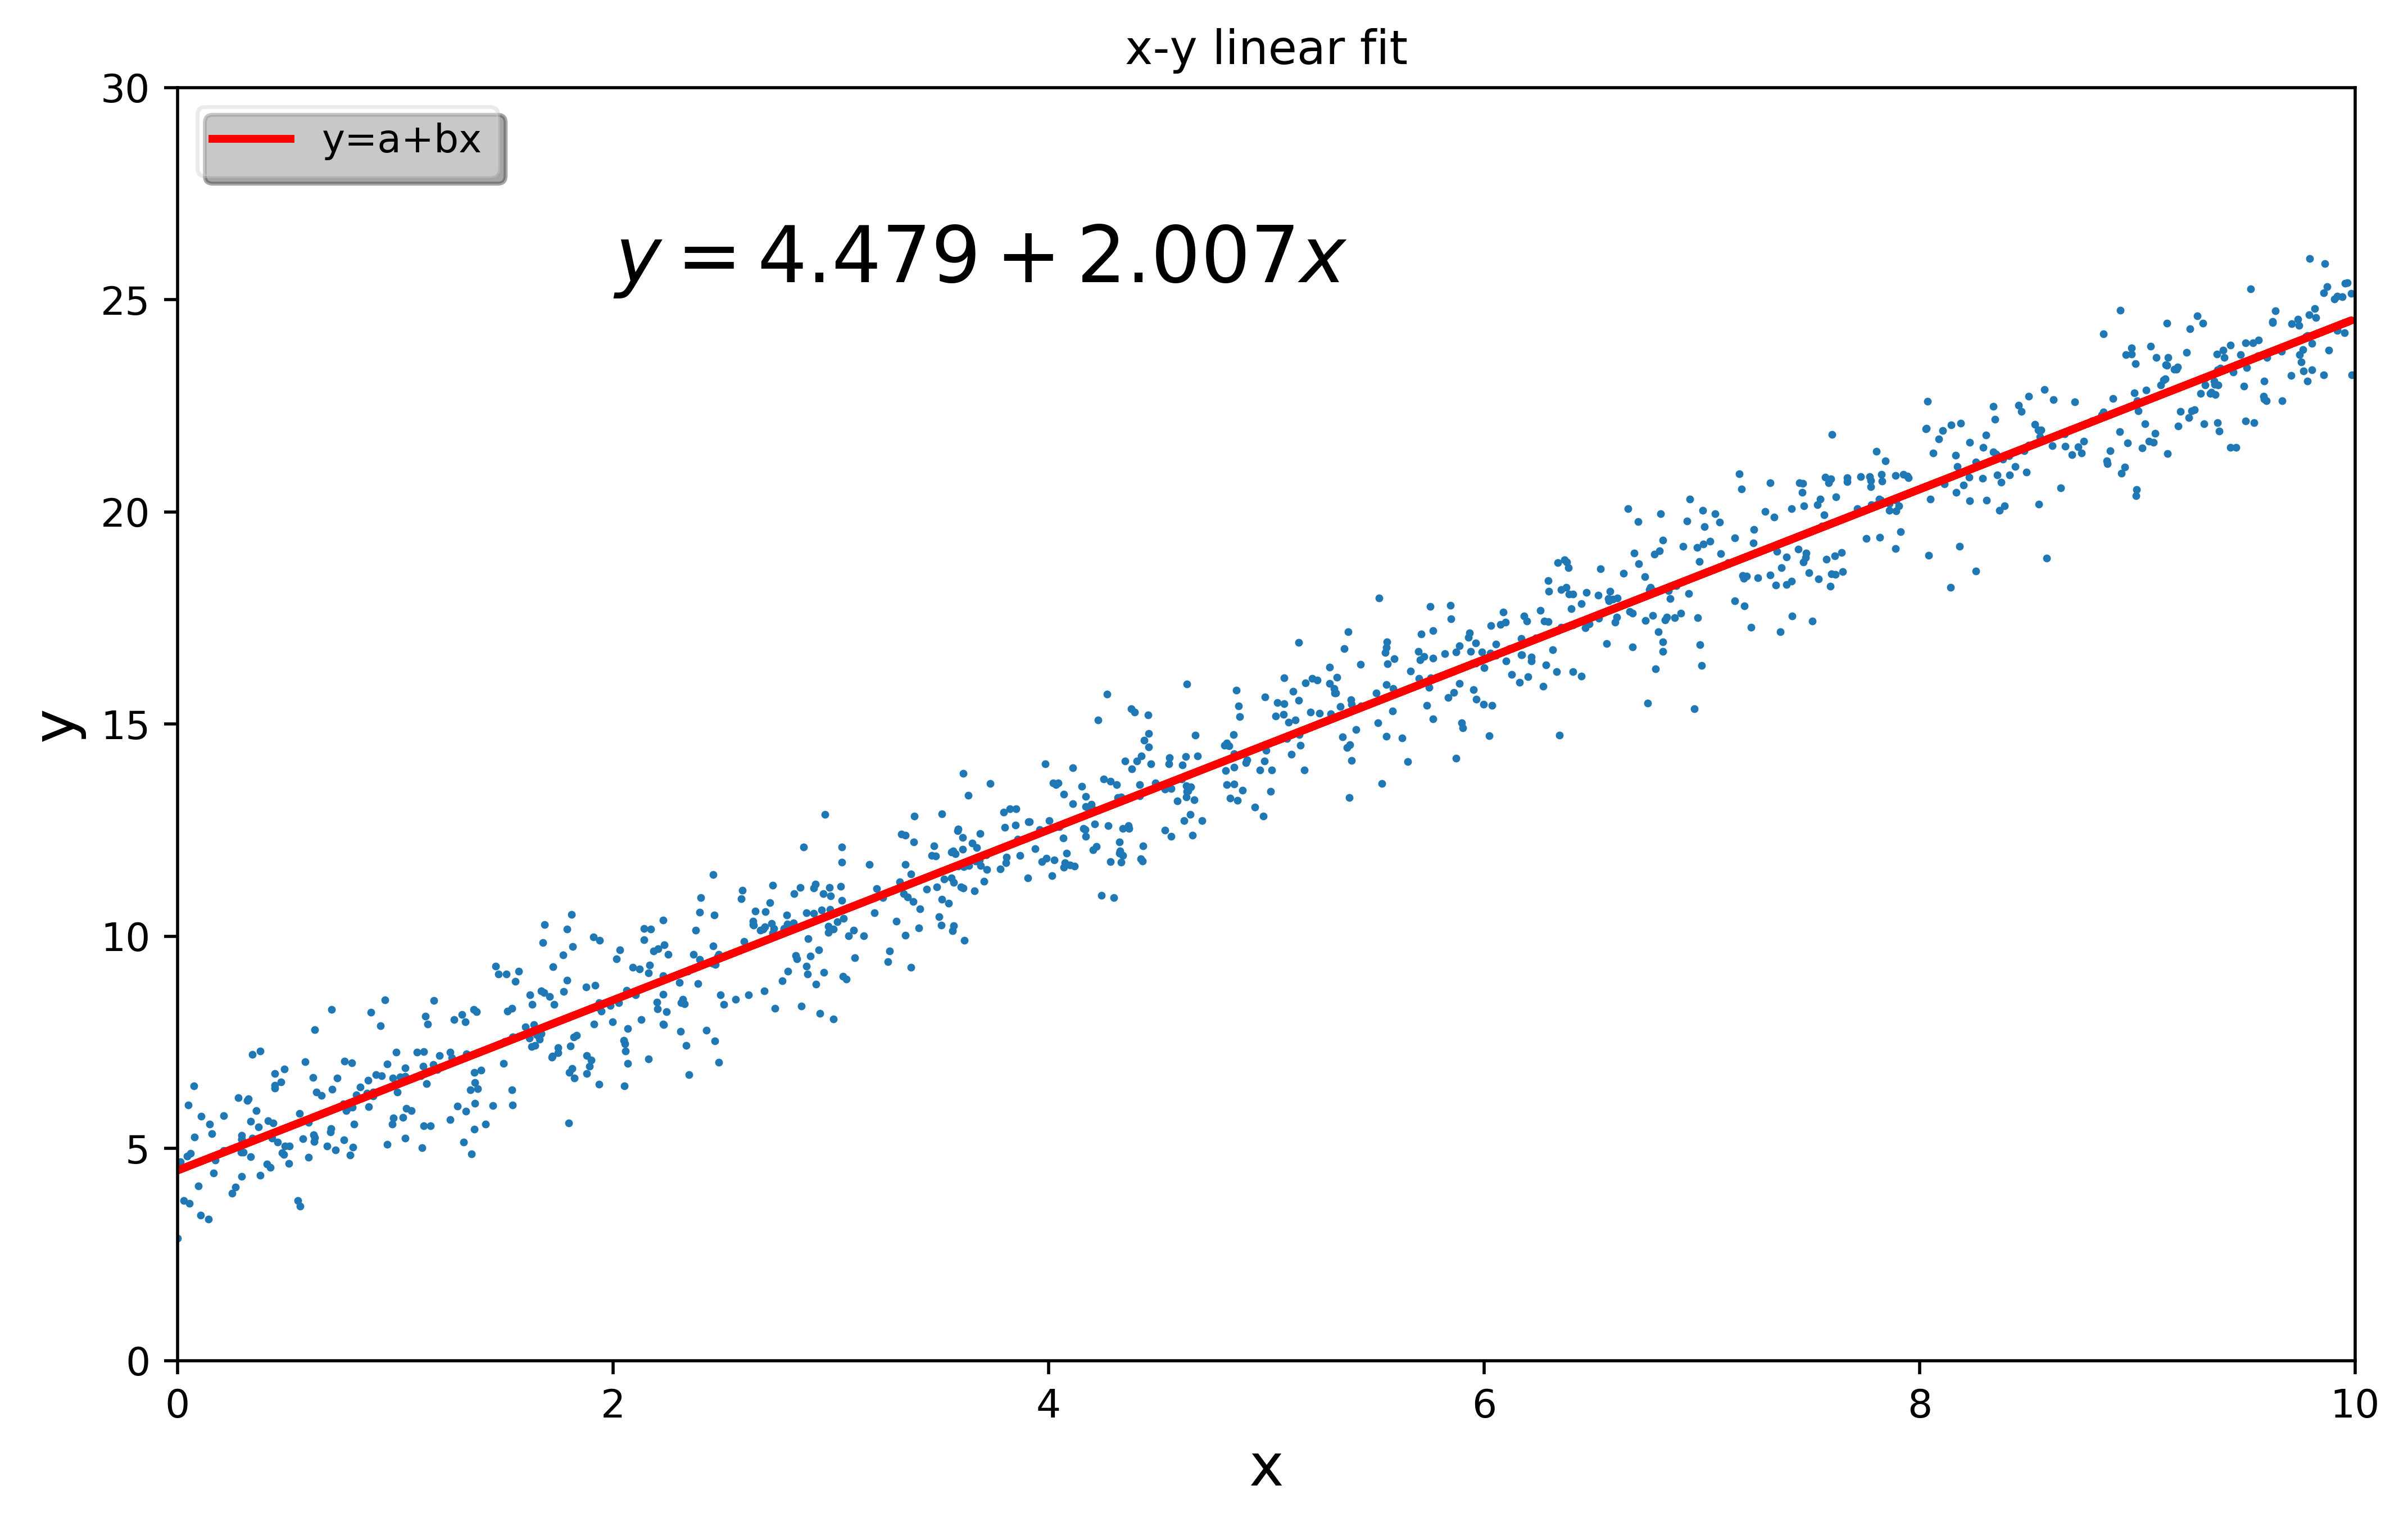

estimators of a :  [[4.47942291]]
estimators of b :  [[2.00666256]]
noise variance  :  0.9356302545750014
covariace[a,b]  :  -0.0005440428879922384
error a         :  0.05979158653559476
error b         :  0.010593380029702887


In [6]:
import pandas as pd
import numpy as np
from numpy import *
import numpy.random as nprd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import corner
import numpy.random as nprd

file1="E:/python/MDC_data_part_1.txt"
part1data=pd.read_csv(file1,header=None,sep='    ',engine='python')
part1data.columns=['x','y']
x=np.array(part1data['x'])
y=np.array(part1data['y'])
file2="E:/python/MDC_data_part_2.txt"
part2data=pd.read_csv(file2,header=None,sep='    ',engine='python')
part2data.columns=['x','y']
x2=np.array(part2data['x'])
y2=np.array(part2data['y'])

def linearfunc(x,a,b):
    return a+b*x
def quadraticfunc(x,a,b,c):
    return a+b*x+c*x**2
def stand_regres(x_mat, y_mat):
    x_mat_T = x_mat.T * x_mat
    reg_coef = linalg.solve(x_mat_T, x_mat.T * y_mat)  # 也可根据numpy中linalg模块中solve方法解ax + b = 0得到回归系数
    return reg_coef

popt,pcov=curve_fit(linearfunc,x,y)#直接使用scipy自带的最小二乘法拟合函数curvefit做线性回归
perr = np.sqrt(np.diag(pcov))


#Python实现最小二乘法并对数据进行拟合
concat=np.c_[x,np.ones((1000,1))] 
x_mat=np.mat(concat)
y_mat=np.mat(y).T
fig, ax = plt.subplots(figsize=(10,6),dpi=500)
ax.set_title('x-y linear fit')
ax.set_xlabel("x",size=15)
ax.set_ylabel("y",size=15)

ax.scatter(x_mat[:,0].flatten().A[0], y_mat[:,:].flatten().A[0],s=1)  # plot scatter of original data
plt.xlim(0,10)
plt.ylim(0,30)
regress_coef = stand_regres(x_mat, y_mat)
#print(regress_coef)
x_copy = x_mat.copy()
y_hat = x_copy * regress_coef
#ax.plot(x_copy[:,0], y_hat,c='r')  # plot regression line
line1, = ax.plot(x_copy[:,0], y_hat, lw=2, label='y=a+bx',c='r')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
tex = r'$y=4.479+2.007x$'
ax.text(2, 25, tex, fontsize=20, va='bottom')
plt.show()
variancey=np.var(y-linearfunc(x,regress_coef[1],regress_coef[0]))
fig.savefig("E:/python/MDC_data_part_1_OLS.png",dpi=500)

#print(pcov)
print("estimators of a : ",regress_coef[1])
print("estimators of b : ",regress_coef[0])
print("noise variance  : ",variancey)
print("covariace[a,b]  : ",pcov[0,1])
print("error a         : ",perr[0])
print("error b         : ",perr[1])